In [2]:
# import the necessary packages
from collections import deque
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
 

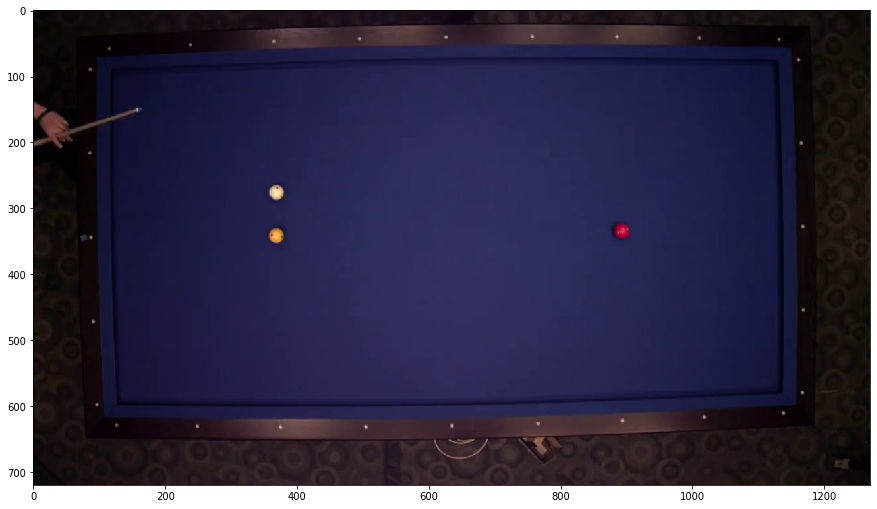

In [3]:
# load video
vs = cv2.VideoCapture("videos/pool.mp4")

# Get frame from video
frame = vs.read()
frame = frame[1]

# show image
plt.figure(figsize = (15,15))
plt.imshow(frame[:, :, ::-1])
plt.show()

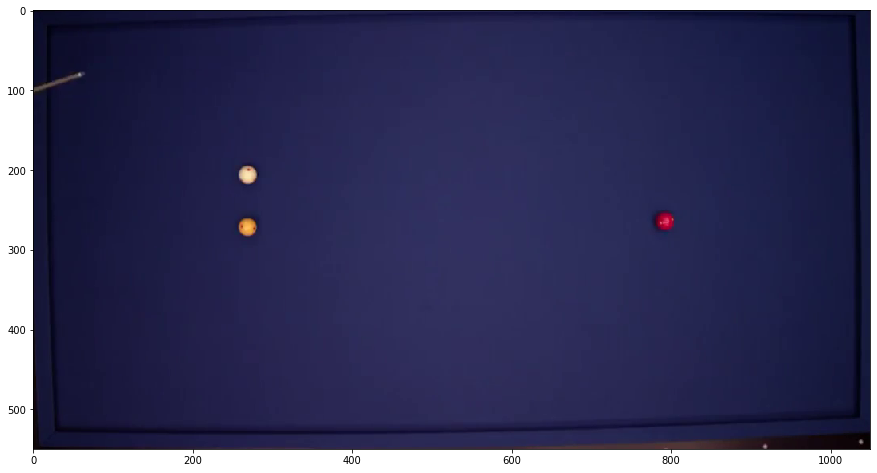

In [4]:
# crop image
frame = frame[70:620, 100:1150]

plt.figure(figsize = (15,15))
plt.imshow(frame[:, :, ::-1])
plt.show()

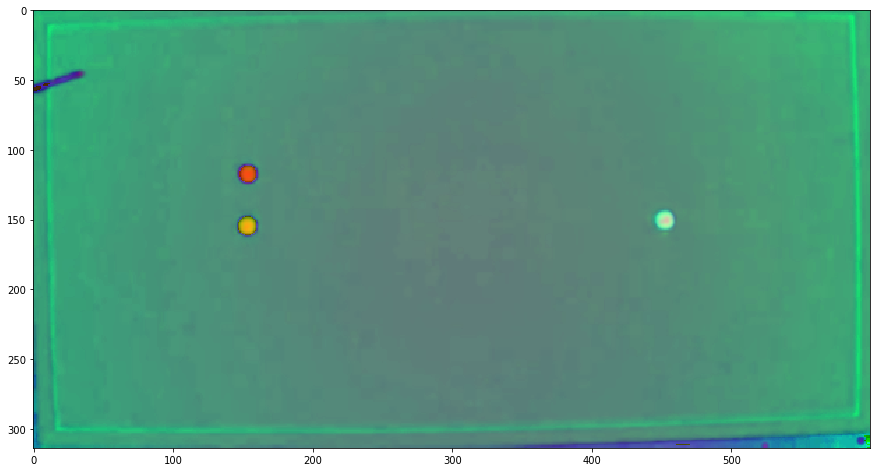

In [5]:
# resize image
frame = imutils.resize(frame, width=600)
#blur image
blurred = cv2.GaussianBlur(frame, (5, 5), 0)
#convert to hsv
hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)

plt.figure(figsize = (15,15))
plt.imshow(hsv[:, :, ::-1])
plt.show()

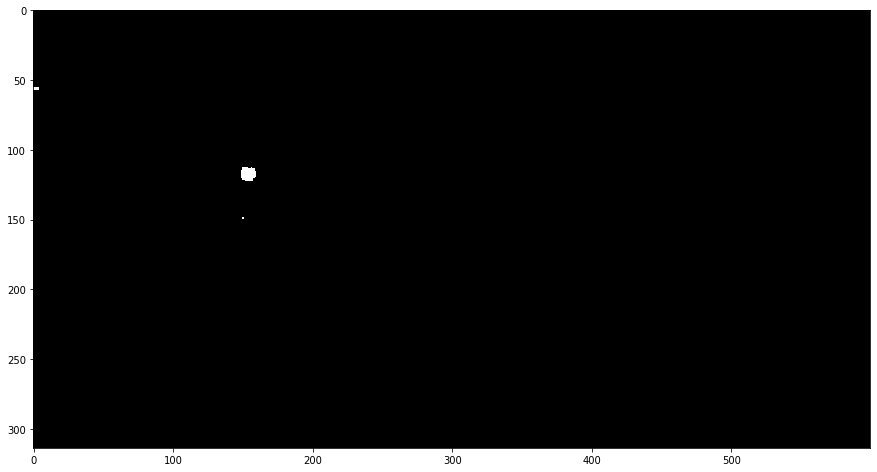

In [6]:
# lower and upper boundaries of the "white"
whiteLower = (10, 1, 1)
whiteUpper = (40, 120, 250)

mask = cv2.inRange(hsv, whiteLower, whiteUpper)

plt.figure(figsize = (15,15))
plt.imshow(mask, cmap='gray')
plt.show()

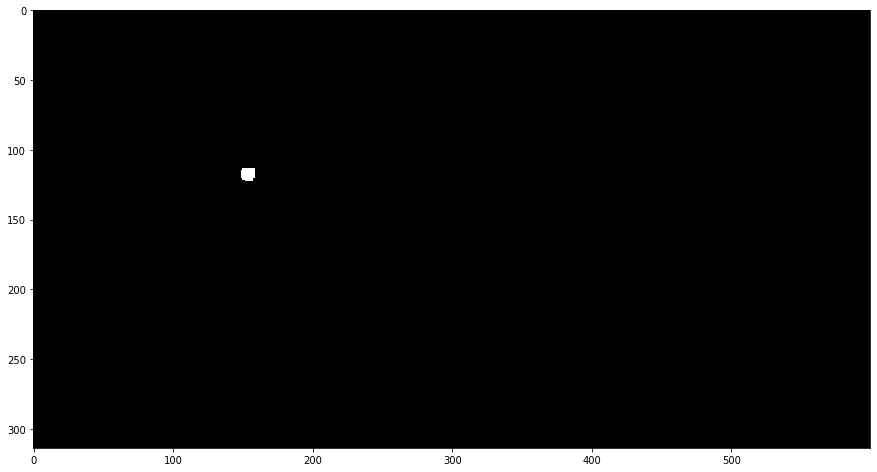

In [7]:
# clean mask
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

plt.figure(figsize = (15,15))
plt.imshow(mask, cmap='gray')
plt.show()

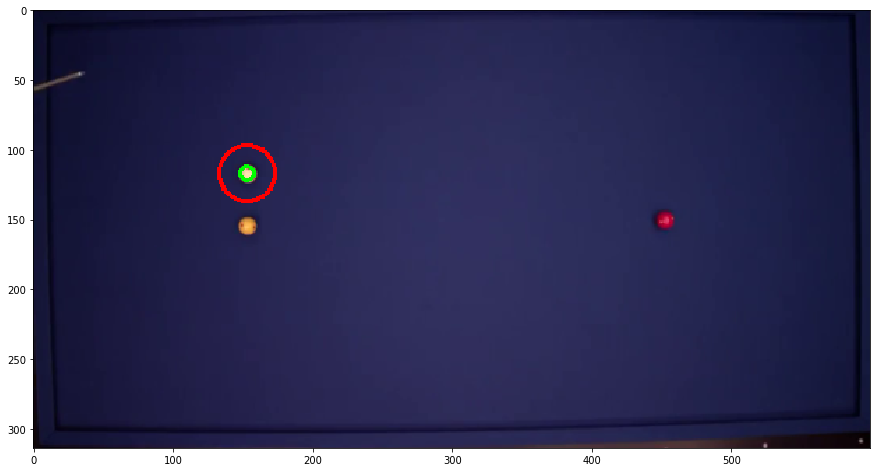

In [15]:
# find contours in the mask and initialize the current
# (x, y) center of the ball
contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

frame_copy = frame.copy()

# only proceed if at least one contour was found
if len(contours) > 0:
    # find the largest contour
    c = max(contours, key=cv2.contourArea)

    # get x,y and radius of minimal enclosing circle of contour
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # only proceed if the radius size is between 5 and 10
    if radius > 5 and radius < 10:
        cv2.circle(frame_copy, (int(x), int(y)), int(radius), (0, 255, 0), 2)
        cv2.circle(frame_copy, (int(x), int(y)), int(20), (0, 0, 255), 2)

plt.figure(figsize = (15,15))
plt.imshow(frame_copy[:, :, ::-1])
plt.show()
vs.release()

In [8]:
WINDOW_NAME = "win"

# load video
vs = cv2.VideoCapture("videos/pool.mp4")

# keep looping
while True:
    
    # Get frame from video
    frame = vs.read()
    frame = frame[1]
 
    # if we are viewing a video and we did not grab a frame,
    # then we have reached the end of the video
    if frame is None:
        break
        
    # crop image
    frame = frame[70:620, 100:1150]
    
    # resize image
    frame = imutils.resize(frame, width=600)
    #blur image
    blurred = cv2.GaussianBlur(frame, (5, 5), 0)
    #convert to hsv
    hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
    
    # lower and upper boundaries of the "white"
    whiteLower = (10, 1, 1)
    whiteUpper = (40, 120, 250)

    mask = cv2.inRange(hsv, whiteLower, whiteUpper)
    
    # clean mask
    mask = cv2.erode(mask, None, iterations=2)
    mask = cv2.dilate(mask, None, iterations=2)
    
    # find contours in the mask and initialize the current
    # (x, y) center of the ball
    contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)

    frame_copy = frame.copy()

    # only proceed if at least one contour was found
    if len(contours) > 0:
        # find the largest contour
        c = max(contours, key=cv2.contourArea)

        # get x,y and radius of minimal enclosing circle of contour
        ((x, y), radius) = cv2.minEnclosingCircle(c)

        # only proceed if the radius size is between 5 and 10
        if radius > 5 and radius < 10:
            cv2.circle(frame_copy, (int(x), int(y)), int(radius), (0, 255, 0), 2)
            cv2.circle(frame_copy, (int(x), int(y)), int(20), (0, 0, 255), 2)
    
    # show the frame to our screen
    cv2.imshow("Frame", frame_copy)
    cv2.waitKey(10)

cv2.waitKey(2000)
cv2.destroyWindow("Frame")
cv2.waitKey(2000)
vs.release()